<a href="https://colab.research.google.com/github/nasirxia/Analysis-Project-2022-Fall/blob/main/ALP-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/sample_data/Data0131.csv")
df.drop(["sale_id","customer_id","sale_date"], axis = 1, inplace=True)
df.head()


,ad_exp,product_id,product_brand,product_name,price,qty,sales,gender,city,st,zip,lat,lng,marital,education,income,age,prime
0,Sponsored Products,224143037,Seattle Gourmet,Seattle Gourmet Adult 7+ Small Bites Chicken M...,16.14,2,32.28,M,Shreveport,LA,71130,32.6076,-93.7526,Single,College graduate,"$60,000 - $79,999",55-64,1
1,Don't recall seeing an ad,834182030,Garland Farms,Garland Farms Healthy Grains Dry Dog Food with...,21.83,3,65.49,M,Fresno,CA,93794,36.7464,-119.6397,Single,High school graduate,"$60,000 - $79,999",35-44,1
2,Don't recall seeing an ad,950844039,Doggo,"Doggo Kibble Dry Dog Food, 20 lb, with Plant B...",57.99,3,173.97,M,Danbury,CT,6816,41.3089,-73.3637,Single,College graduate,"Less than $20,000",25-34,1
3,Sponsored Products,378059009,Alpha,"Alpha Shredded Blend High Protein, Adult Dry D...",63.98,2,127.96,F,San Antonio,TX,78215,29.4413,-98.4793,Married,College graduate,"$20,000 - $39,999",25-34,1
4,Don't recall seeing an ad,151595003,Alpha,"Alpha Natural Sensitive Systems, Skin & Coat S...",48.99,1,48.99,F,Boise,ID,83711,43.4599,-116.2440,Married,Some college or trade school,"$80,000 - $99,999",55-64,0


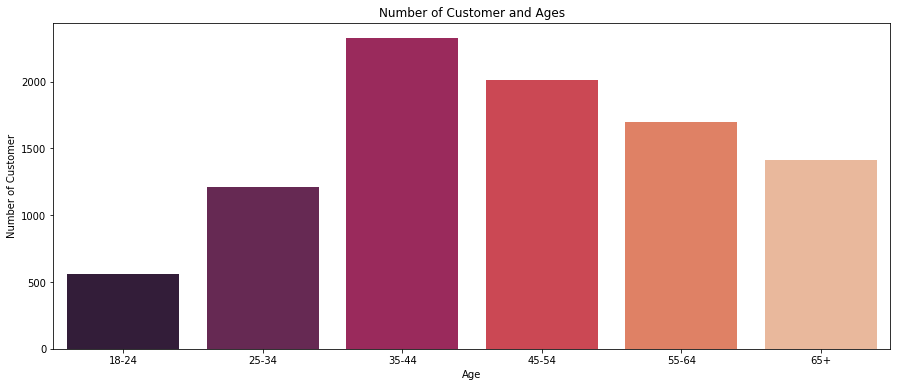

In [6]:
age18_24 = df.age[df.age == "18-24"]
age25_34 = df.age[df.age == "25-34"]
age35_44 = df.age[df.age == "35-44"]
age45_54 = df.age[df.age == "45-54"]
age55_64 = df.age[df.age == "55-64"]
age65above = df.age[df.age == "65+"]


x = ["18-24","25-34","35-44","45-54","55-64","65+"]
y = [len(age18_24.values),len(age25_34.values),len(age35_44.values),len(age45_54.values),len(age55_64.values),len(age65above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

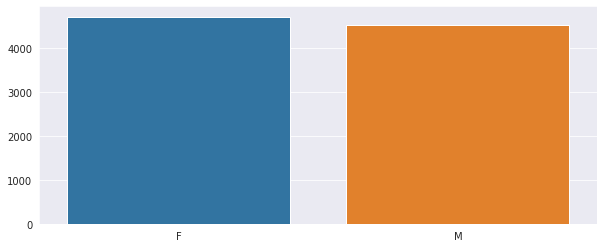

In [10]:
genders = df.gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

In [11]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

ValueError: ignored